# Titanic Prediction

# Scope of Projec and Planning
______________________________

<h3>Objective</h3>
    <li>Predict the most possible who was survived in Titanic Tragedy </li>
    <li>Predict the news people like you or me were survived or died if we were there</li>
    
<h3>How Solve The Problem</h3>
    <li>Using <b>Machine Learning</b> with EDA and Features Engineering for predicting Using Python</li> 
    <li>Create a interface to input the new data like you or me using Django</li>

<h3>How Can you know if Work</h3>
    <li>Metrics</li>
        <li>Accuracy</li>
        <li>F1</li>
        <li>ROC-AUC</li>
        <li>LogLoss</li>
<h3>Action Planning:</h3>
    <li>0 - &#10004;Building a structore of project, folder, files and datas and classes for documentation, scope and tasks.</li>
    <li>1 - &#10004;Data collect - Kaggle csv download</li>
    <li>2 - &#10004; EDA - Exploratory data, Understanting and seeing the charts of datas, and correlations</li>
    <li>3 - &#10004; Data Preparation, Feature engineering</li>
    <li>4 - &#10004;Getting the baseline, you must going to across the baseline</li>
    <li>5 - &#10004;Validation the train data with simple solutions models like a RandomForestClassifier</li>
    <li>6 - &#10004;Emprove score with another models, if it's necessary you can return to step 3, 2 or 1, when you can't better more, pass to next</li>
    <li>7 - &#9634; Emprove the score ultil get 0.81 with boosting, tunning, scaler data, balancing class, and optimazetions soluctions</li>
    <li>8 - &#10004;Create test features like a train code pre-processing</li>
    <li>9 - &#10004;Submmit the solution to the kaggle plataform</li>
    <li>10- &#9634; Create a simple interface page to input the news supposed people and get the predictions if survived or died</li>
    <li>11- &#9634; Create a deploy on Heroku</li>
    <li>12- &#10004;Share the solution --> Linkedin, reddit, kaggle, git and Hackernews</li>

In [1009]:
# !pip install scikit-optimize
 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RepeatedKFold
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, power_transform
from skopt import dummy_minimize, plots

from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn.feature_selection import RFE

Populating the interactive namespace from numpy and matplotlib


# 01 - Business Undertanding
____________________________

The Titanic was one of tragedy, thousands people dead because they not was preperade to save all the people
This project consist in hands on the data science project soluction , answears some asks and hypoteses
This competition is one of more important in the kaggle competition, to understand more about the competition click <a href="https://www.kaggle.com/docs/competitions">Titanic Competition</a>
It's important you understand the data and your mean, for this there are a lot of explanation click <a href="https://www.kaggle.com/c/titanic/overview">Overview Titanic</a>


# 02 - Data Collect
___________________

<h4> The data collect is the kaggle dataset click this link and will download <a href="https://www.kaggle.com/c/3136/download-all">Kaggle Dataset Download</a></h4>

In [180]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# 03 - EDA - Data Exploratory Analysis
______________________________________

<title>Hypoteses and Questions</title>
<ul id="myUL">
    <li>&#10004; Women and child survived first?</li>
    <li>&#10004; How more rich is people more possibily to survived?</li>
    <li>Where the safe boat are? wich floor? in this floor is it more possible survived people stayed in room the same floor?</li>
    <li>&#10004; First class was there more chance of surviver than second and third classes?</li>
    <li>&#10004; The solders and people keeping the shipp safe, were they less chance of survived " the capt die with shipp"</li>
</ul>


______________

<p>Created two vars, "objects" and "numerics" for using and transform
Let's see the easier first, the no objects
The first Column is PassengerId, this column aren't be like a feature, because is not a standart, than we must remove them.
Survived will be necessary for analysis with others features lika a correlation matrix for exemple 
Pclass is a class when the people stay, 1, 2 or 3 classes</p>
<lu>
    <li>&#10004;- PassengerId:- Remove from train and test</li>
    <li>&#10004;- Survived:----- Keep in train, but remove in X to use in model</li>
    <li>&#10004;- Sex:----------- Convert string to binarium (0 = male, 1= female)</li>
    <li>&#10004;- Pclass:-------- Keep this columns and create news slices features for using with Age and other possibilities</li>
    <li>&#10004; - Age:----------Replace NaN to median from sliced by Pclass grouped Survived and split the ages following histogram</li>
    <li>&#10004;- SibSp | Parch:-Sum bouth, not was better, than toke separeted, validation with standardScale better in %, but I'll do this for last</li>
    <li>&#10004;- Fare:---------- Use the StandartScaler and try others, MinMaxScaler and PowerTransform from sklearn</li>
    <li>&#10004;- Embarked:--- Replace NaN to 'S', get_dummies to three new columns and drop the original</li>
    <li>&#10004;- Name:-------- Split the title surname and create a dummies values</li>
    <li>&#10004;- Cabin:-------- Done slice from NaN and first letter corresponding of Deck </li>
    <li>&#10004;- Ticket:-------- Got the value counts of the same ticket </li>


</lu>

In [ ]:
col_obj = df_train.columns[df_train.dtypes == object]
col_num = df_train.columns[df_train.dtypes != object]

In [ ]:
df_train[col_num].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df_train[col_obj].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
print(f'Shape train -->> {df_train.shape}')
print(f'Null columns--------------\n{df_train.isnull().sum()}')

# Age      = 177 null values
# Cabin    = 687 null values
# Embarked = 2 null value

Shape train -->> (891, 12)
Null columns--------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


> <h2>PassangerId and Survived</h2>
PassangerId it's not copy you can't use this column like a feature

> <h2>Pclass</h2>
The value counts are thirt class has 55% of total passengers

In [ ]:
print(f'{df_train.Pclass.value_counts()}\n{df_train.Pclass.value_counts() / df_train.shape[0]}')

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


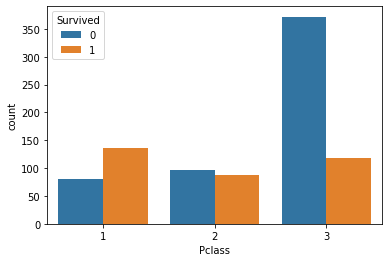

In [ ]:
sns.countplot(x='Pclass', data=df_train, hue='Survived')

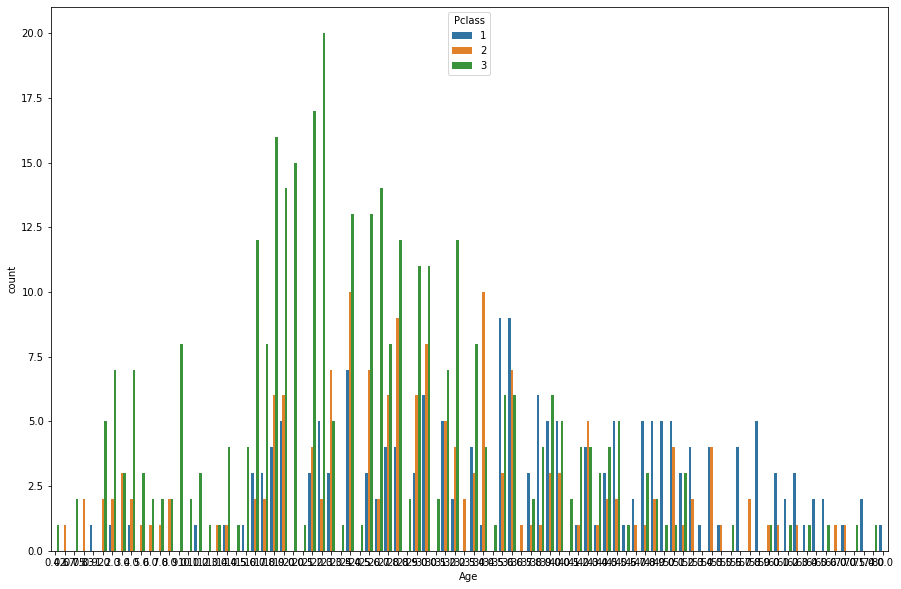

In [182]:
plt.figure(figsize=(15,10))
sns.countplot(x='Age', data=df_train, hue='Pclass')

<p>You see that class 3 has more dead than class 1 and 2 together, otherwords I think filter this dead in class 3
and understanding why and see the NaN number and features, for exemple, if it's age NaN, it's betterget the
median or mean this slice, but it's not possible slices with survived, tha you will make a comparation survived wih Pclass and Age
You get the slices of Survived and Pclass information comparison, this filter could be use in the others features.</p>
<p>From histogram Pclass and Survived, was possible created the range of age, than you can see the comparison between Pclass and Sex and Age</p>
<p>Can you see, the best match is get mean from Pclass | Sex | Age, you going to do the same way the code below</p>
<p>df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male').mean()</p>

In [ ]:
print(f'Mean Age from Class_3: {df_train.Age[df_train.Pclass == 3].median()}')
print(f'Mean Age from Class_2: {df_train.Age[df_train.Pclass == 2].median()}')
print(f'Mean Age from Class_1: {df_train.Age[df_train.Pclass == 1].median()}')

Mean Age from Class_3: 24.0
Mean Age from Class_2: 29.0
Mean Age from Class_1: 37.0


In [ ]:
print(f'Clas_3 fem - sur - count: 47 - med: {df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == "female") & (df_train.Survived == 1)].median()}') # 47
print(f'Clas_2 fem - sur - count: 68 - med: {df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == "female") & (df_train.Survived == 1)].median()}') # 68
print(f'Clas_1 fem - sur - count: 82 - med: {df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == "female") & (df_train.Survived == 1)].median()}') # 82
print(f'Clas_3 fem - die - count: 55 - med: {df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == "female") & (df_train.Survived == 0)].median()}') # 55
print(f'Clas_2 fem - die - count:  6 - med: {df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == "female") & (df_train.Survived == 0)].median()}') # 6
print(f'Clas_1 fem - die - count:  3 - med: {df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == "female") & (df_train.Survived == 0)].median()}') # 3

Clas_3 fem - sur - count: 47 - med: 19.0
Clas_2 fem - sur - count: 68 - med: 28.0
Clas_1 fem - sur - count: 82 - med: 35.0
Clas_3 fem - die - count: 55 - med: 22.0
Clas_2 fem - die - count:  6 - med: 32.5
Clas_1 fem - die - count:  3 - med: 25.0


<p>Mean or median is the same</p>

In [ ]:
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'female')].mean(), df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'female')].median()

(102, 102)

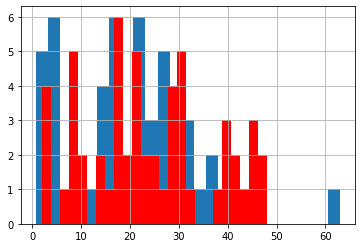

In [ ]:
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'female') & (df_train.Survived == 1)].hist(bins=25)
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'female') & (df_train.Survived == 0)].hist(bins=25, color='red')

<p>Class 2 it's good slice, because mot of female people survived, probaly mean it's better here</p>

In [ ]:
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'female')].mean(), df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'female')].median()

(28.722972972972972, 28.0)

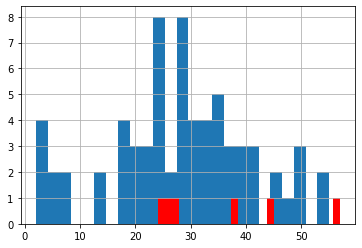

In [ ]:
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'female') & (df_train.Survived == 1)].hist(bins=25)
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'female') & (df_train.Survived == 0)].hist(bins=25, color='red')

<p>The same way here, mean it's better</p>

In [ ]:
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'female')].mean(), df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'female')].median()

(34.61176470588235, 35.0)

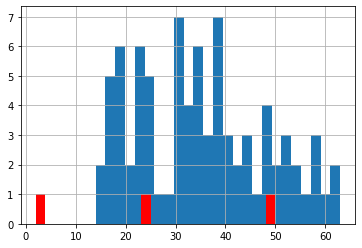

In [ ]:
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'female') & (df_train.Survived == 1)].hist(bins=25)
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'female') & (df_train.Survived == 0)].hist(bins=25, color='red')

<p>Mean it's better</p>

In [ ]:
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male')].mean(), df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male')].median()

(26.507588932806325, 25.0)

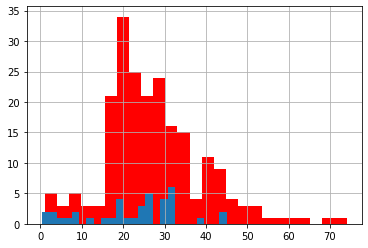

In [ ]:
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male') & (df_train.Survived == 0)].hist(bins=25, color='red')
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male') & (df_train.Survived == 1)].hist(bins=25)

<p> Median it's better because it's closer than frequence</p>

In [ ]:
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'male')].mean(), df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'male')].median()

(30.74070707070707, 30.0)

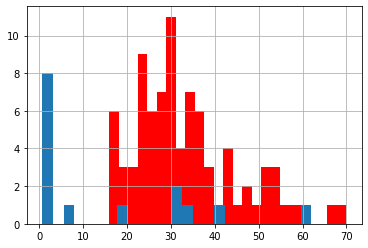

In [ ]:
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'male') & (df_train.Survived == 0)].hist(bins=25, color='red')
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'male') & (df_train.Survived == 1)].hist(bins=25)

<p> Median it's better because it's closer than frequence</p>

In [ ]:
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'male')].mean(), df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'male')].median()

(41.28138613861386, 40.0)

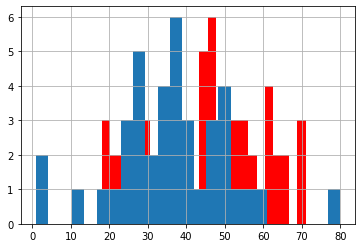

In [ ]:
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'male') & (df_train.Survived == 0)].hist(bins=25, color='red')
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'male') & (df_train.Survived == 1)].hist(bins=25)

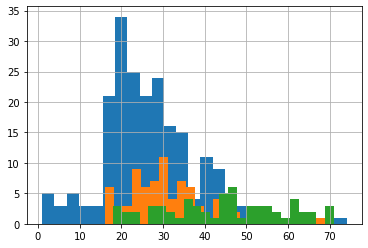

In [ ]:
df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male') & (df_train.Survived == 0)].hist(bins=25)
df_train.Age[(df_train.Pclass == 2) & (df_train.Sex == 'male') & (df_train.Survived == 0)].hist(bins=25)
df_train.Age[(df_train.Pclass == 1) & (df_train.Sex == 'male') & (df_train.Survived == 0)].hist(bins=25)

In [ ]:
class_3_died = df_train[(df_train.Pclass == 3) & (df_train.Survived == 0)]
class_2_died = df_train[(df_train.Pclass == 2) & (df_train.Survived == 0)]
class_1_died = df_train[(df_train.Pclass == 1) & (df_train.Survived == 0)]
class_3_surv = df_train[(df_train.Pclass == 3) & (df_train.Survived == 1)]
class_2_surv = df_train[(df_train.Pclass == 2) & (df_train.Survived == 1)]
class_1_surv = df_train[(df_train.Pclass == 1) & (df_train.Survived == 1)]

<p>The conclusion is that you get the mean and median with filter Pclass and Sex, same a exemple below</p>
<p> df_train.Age[(df_train.Pclass == 3) & (df_train.Sex == 'male').mean()</p>

><h2>Age</h2>

After analysis you decided replace the Nan to mean by Pclass sliced, Let's take a look histograma about them
Conclution is that each class done below you going to get the median because of distribution type
After this you get the slices of ages this slices are following histogram distribution where are
more survived people slice there and create news features, I write the suppose split, but
it's necessary replace first to see, let's see now without change the feature just to see
it's strange, but, let's try the score after the engineer

Split ages
<= 15      - split it's more survived people
>= 16 <=30 - split it's more died
>= 31 <=40 - split it's more survived people
>=41       - split 50/50, so so

In [ ]:
print(f""" 
Died  Class 3 - Mean: {round(class_3_died.Age.mean(), ndigits=2)}   Median: {class_3_died.Age.median()}
Died  Class 2 - Mean: {round(class_2_died.Age.mean(), ndigits=2)}   Median: {class_2_died.Age.median()}
Died  Class 1 - Mean: {round(class_1_died.Age.mean(), ndigits=2)}    Median: {class_1_died.Age.median()}
Lived Class 3 - Mean: {round(class_3_surv.Age.mean(), ndigits=2)}   Median: {class_3_surv.Age.median()}
Lived Class 2 - Mean: {round(class_2_surv.Age.mean(), ndigits=2)}    Median: {class_2_surv.Age.median()}
Lived Class 1 - Mean: {round(class_1_surv.Age.mean(), ndigits=2)}   Median: {class_1_surv.Age.median()}
""")

 
Died  Class 3 - Mean: 26.56   Median: 25.0
Died  Class 2 - Mean: 33.54   Median: 30.5
Died  Class 1 - Mean: 43.7    Median: 45.25
Lived Class 3 - Mean: 20.65   Median: 22.0
Lived Class 2 - Mean: 25.9    Median: 28.0
Lived Class 1 - Mean: 35.37   Median: 35.0



(<matplotlib.axes._subplots.AxesSubplot at 0x1cd7b21ec18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cd7b21ec18>)

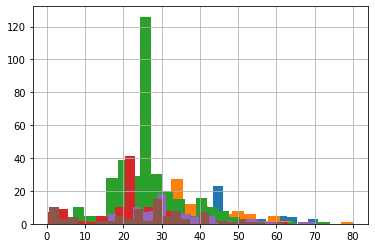

In [ ]:
class_1_died.Age.fillna(45).hist(bins=25), class_1_lived.fillna(35).Age.hist(bins=25)
# < 4
# > 10 and < 42
class_3_died.fillna(25).Age.hist(bins=25), class_3_lived.fillna(22).Age.hist(bins=25)
# < 5
# > 18 and < 32
class_2_died.fillna(30).Age.hist(bins=25), class_2_lived.fillna(28).Age.hist(bins=25)
# < 10
# > 18 and < 25

<h2>SibSP and Parch</h2>

SibSp and Parch it's very simylar, than you get sum them and concatened only one columns
the histogram and coutplot show you how much they are simylar, they are.

(<matplotlib.axes._subplots.AxesSubplot at 0x1cd79634e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cd79634e80>)

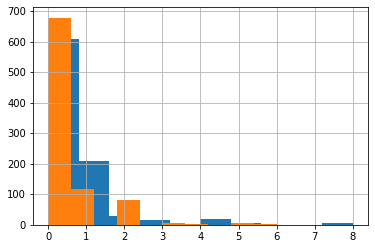

In [ ]:
df_train.SibSp.hist(), df_train.Parch.hist()

this histogram aboce has very hight in the left, it's be a negative distribution, it's important standard this data

In [ ]:
#sns.countplot(x='SibSp', data=df_train, hue='Survived')

In [ ]:
#sns.countplot(x='Parch', data=df_train, hue='Survived')

<h2>Fare</h2>

<p>Fare, it's possible how much more money, more possibility living ?
The value_counts show up that more frequency are the cheaper fare, than more people dead than survived, suppose to
that how much more is fare, more people survive, let's see the mean:32 and median:14 - it's so differents, it's suppose to
the distribrution is very assimetric, let's see - wouuu! see the histogram, it's positive assimetric, see the describe
it's very hard standard desviation, it's Necessary standarlization, see this link <a href='https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9'>Medium Data Hackers</a></p>

<p>First of all I'm going to get the number from Fare, may split and create news colums and try validation for know how better, after I had got better validation I lefted that, and when I will finished the all data preparetion, I'm going to try the MinMaxScaler, after that let's try the StandartScaler and try other powertransform, and chose better score</p>

<p>There are many outliers, in this case I'm not going to remove the outliers, because this outliers it's correct, than I can't remove them, others solutions are change the value to mean, but it's chance to be worst, them I think it's better split the values, create another columns to put the outliers</p>

<p>There are another very used way to get the outliers, see this link <a href='https://minerandodados.com.br/tratando-outliers-python/'> Outliers</a></p>

<p>Let's try this way to data manipulation like this linke above, this way = mean - or + (2 * std)</p>

In [ ]:
df_train.Fare.value_counts()
df_train.Fare.mean(), df_train.Fare.median()

(32.2042079685746, 14.4542)

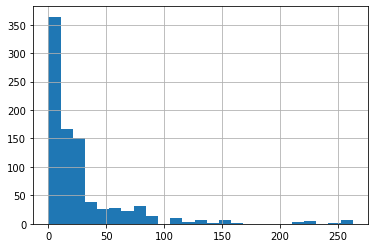

In [ ]:
df_train.Fare[df_train.Fare <300].hist(bins=25)

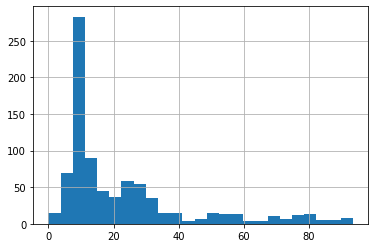

In [ ]:
#df_train.Fare[df_train.Fare > 100].hist()
df_train.Fare[df_train.Fare < 100].hist(bins=25)

In [ ]:
df_train.Fare.describe()
# Q3 - Q1 = FIQ
# 31 - 7.91 = 23.09
# Q3 +(FIQ*1.5) = > 65.63 there are many outliers
# Q1 -(FIQ*1.5) = < -26.72 no outlier

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

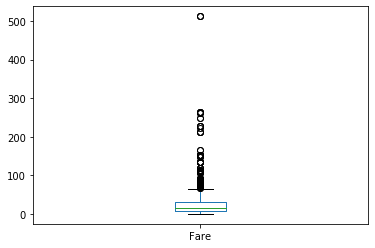

In [ ]:
df_train.Fare.plot(kind='box')

<p>There are another very used way to get the outliers, see this link <a href='https://minerandodados.com.br/tratando-outliers-python/'> Outliers</a></p>

<h2>Embarked</h2>

Let's see the  informations about, the most value are in 'S' embarked, and there are two NaN, let's replace to S, because it's the most count, after that you had replaced you transformed string to number map()

In [ ]:
print(df_train.Embarked.value_counts())
print('NaN: ', df_train.Embarked.isnull().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
NaN:  2


<h2>Name</h2>

you can get the title like [Mr, Mrs, Miss, etc], because it's possible mean, after do you see contains, you replace the name for just title, than you convert string to numbers with getdummies

Another thing maybe it's important, get the surname, maybe the same surname if woman died, it's possible that the man and child died too, if child survived, it's possible that her mother survived too, and about a man, you think after that.

As you see, I think that is two ways to get better score, let's see, in data transformation

In [ ]:
surname = df_train.Name.str.extract(r'(\w+)')
surname.columns = ['Surname']

In [ ]:
df = df_train.copy()
df = pd.concat([df, surname], axis=1).copy()

mapping = df.Surname.value_counts()

df.Surname = df.Surname.map(mapping).copy()
df.head()

In [ ]:
surname = ['Mr.', 'Mrs', 'Miss', 'Master', 'Rev.', 'Dr', 'Col.', 'Sir.', 'Major', 'Don.', 'Capt']
for rep in surname:
    for name in df['Name'][df.Name.str.contains(rep, regex=False)]:
        if rep in ['Col.', 'Major', 'Capt']:
            df.replace(name, 'Army', inplace=True)
        elif rep in ['Sir.', 'Don.']:
            df.replace(name, 'Mr.', inplace=True)
        else:
            df.replace(name, rep, inplace=True)

for title in df.Name:
    if title not in ['Mr.', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Army']:
        df.replace(title, 'Miss', inplace=True)

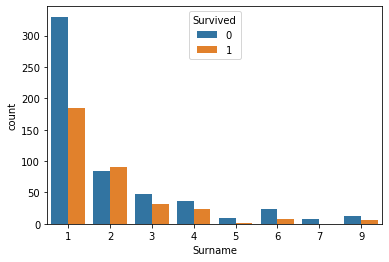

In [ ]:
sns.countplot('Surname', hue='Survived', data=df)

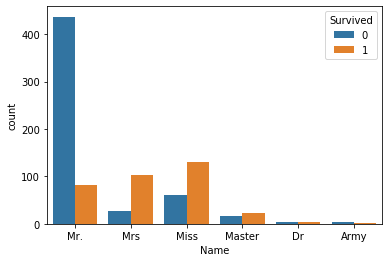

In [ ]:
sns.countplot('Name', hue='Survived', data=df)

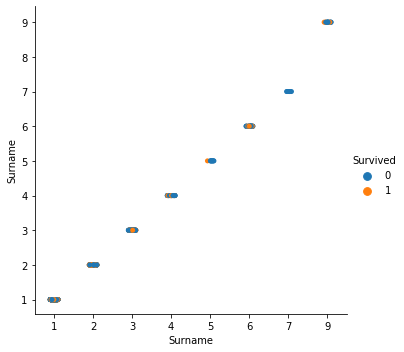

In [ ]:
sns.catplot(x='Surname', y='Surname', hue='Survived', data=df)

<h2>Cabin</h2>

<p>Cabin has a information how deck corresponding , it's can be a important, let's get only the first letter that corresponding the deck, see this link <a href='https://www.encyclopedia-titanica.org/cabins.html'>Deck Titanic Cabin</a></p>
<p>As you see in plotting, there not so much count, but maybe you can get the good training with this, after you get with regex a first letter, create a new columns and concat to train dataframe and convert to numbers with dummies</p>

In [ ]:
import re

In [ ]:
cab = pd.DataFrame()

In [ ]:
cab_ = df_train.Cabin.str.extract((r'([A-Za-z])'), ).fillna(0).copy()
cab = pd.concat([cab, cab_], axis=1).copy()
cab.columns = ['cabin']

In [ ]:
cab.cabin.value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

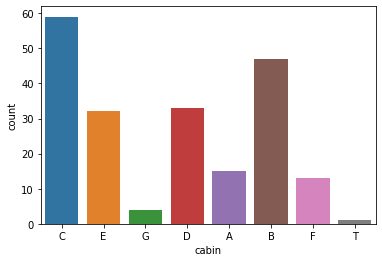

In [ ]:
sns.countplot('cabin', data=cab[cab.cabin != 0])

<h2>Ticket</h2>

In [ ]:
df_train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
df_train.Ticket.str.extract(r'([A-Za-z])').head()

,0
0,A
1,P
2,S
3,NaN
4,NaN


As you See the repetition from ticket maybe meaning more survived, because, suppose to that are the same family, friends or culture, in theory maybe they made decitions based in their relationship, let's see in the score

In [352]:
df_train[df_train.Ticket == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


As you see above, 5 persons suvived and 2 died, and has two the same surname, if you see in SibSp and Parch are zero, it's should be a number of family, than, suppose to they are the same family, i's important for the statistic model make a decision

In [370]:
mapping_ticket = df_train['Ticket'].value_counts().copy()
ticket = df_train['Ticket'].copy()
ticket = ticket.map(mapping_ticket)

In [372]:
ticket.head(10)

0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    4
8    3
9    2
Name: Ticket, dtype: int64

# 04 - Data Preparation
___________________

This phase consist in change the data and create the features and each time you change, you try the predict to
know how is score, and comparing between them

> Features 1

In [980]:
train = pd.DataFrame()
# Create new variable for Data Preparation
train['Survived'] = df_train['Survived'].copy()
train['Pclass'] = df_train['Pclass'].copy()
train['Sex'] = df_train.Sex.map({
    'female':1,
    'male':0
}).copy()

features = train.columns.drop('Survived')

> Features 2

In [981]:
train['Age'] = df_train['Age'].copy()

med_cl_fem_3 = train.Age[(train.Pclass == 3) & (train.Sex == 1)].median()
med_cl_fem_2 = train.Age[(train.Pclass == 2) & (train.Sex == 1)].median()
med_cl_fem_1 = train.Age[(train.Pclass == 1) & (train.Sex == 1)].median()
med_cl_mal_3 = train.Age[(train.Pclass == 3) & (train.Sex == 0)].median()
med_cl_mal_2 = train.Age[(train.Pclass == 2) & (train.Sex == 0)].median()
med_cl_mal_1 = train.Age[(train.Pclass == 1) & (train.Sex == 0)].median()

train.Age[(train.Pclass == 3) & (train.Sex == 1)] = train.Age[(train.Pclass == 3) & (train.Sex == 1)].fillna(med_cl_fem_3)
train.Age[(train.Pclass == 2) & (train.Sex == 1)] = train.Age[(train.Pclass == 2) & (train.Sex == 1)].fillna(med_cl_fem_2)
train.Age[(train.Pclass == 1) & (train.Sex == 1)] = train.Age[(train.Pclass == 1) & (train.Sex == 1)].fillna(med_cl_fem_1)
train.Age[(train.Pclass == 3) & (train.Sex == 0)] = train.Age[(train.Pclass == 3) & (train.Sex == 0)].fillna(med_cl_mal_3)
train.Age[(train.Pclass == 2) & (train.Sex == 0)] = train.Age[(train.Pclass == 2) & (train.Sex == 0)].fillna(med_cl_mal_2)
train.Age[(train.Pclass == 1) & (train.Sex == 0)] = train.Age[(train.Pclass == 1) & (train.Sex == 0)].fillna(med_cl_mal_1)

features = train.columns.copy()

> Features 3

In [982]:
age_4 = train.Age[train.Age <=4].copy()
age_30 = train.Age[(train.Age >=4) & (train.Age <=30)].copy()
age_40 = train.Age[(train.Age >=31) & (train.Age <=40)].copy()
age_80 = train.Age[train.Age >=41].copy()
age_4.name, age_30.name = 'age_4', 'age_30'
age_40.name, age_80.name = 'age_40', 'age_80'

train = pd.concat([train, age_4], axis=1).fillna(0)
train = pd.concat([train, age_30], axis=1).fillna(0)
train = pd.concat([train, age_40], axis=1).fillna(0)
train = pd.concat([train, age_80], axis=1).fillna(0)

features = train.columns

> Features 4

In [983]:
train.drop('Age', axis=1, inplace=True)

features = train.columns

> Features 5

In [984]:
train['Age'] = df_train['Age'].copy()
for i in range(len(train.Age)):
    if train.Age[i] != float(train.Age[i]):
        train.Age[i] = np.mean(train.Age)

features = train.columns
features = features.drop(['Survived', 'age_4', 'age_30', 'age_40', 'age_80'])

> Featurs 6

In [985]:
train = train.drop(['Age'], axis=1)

train['Family_size'] = df_train.SibSp + df_train.Parch
features = train.columns.drop('Survived')

In [986]:
features = train.columns.drop(['Family_size', 'Survived'])

> Features 7

In [987]:
train['SibSp'] = df_train['SibSp'].copy()
train['Parch'] = df_train['Parch'].copy()

features = train.columns.drop('Survived')

> Features 8

In [988]:
outlier = np.mean(df_train.Fare) + (2 * np.std(df_train.Fare))
fare_out = df_train.Fare[df_train.Fare >= outlier].copy()
fare = df_train.Fare[df_train.Fare < outlier].copy()
fare_out.name, fare.name = 'Fare_out', 'Fare'

train = pd.concat([train, fare_out], axis=1).fillna(0)
train = pd.concat([train, fare], axis=1).fillna(0)

features = train.columns.drop('Survived')

> Features 9

In [989]:
train['Embarked'] = df_train['Embarked'].fillna('S').copy()
embark = pd.get_dummies(train['Embarked'], prefix='Embark')
train = pd.concat([train, embark], axis=1).copy()
train = train.drop('Embarked', axis=1).copy()

features = train.columns.drop('Survived').copy()

> Features 10

In [990]:
train['Name'] = df_train.Name.copy()
surname = ['Mr.', 'Mrs', 'Miss', 'Master', 'Rev.', 'Dr', 'Col.', 'Sir.', 
           'Major', 'Don.', 'Capt']
for rep in surname:
    for name in train['Name'][train.Name.str.contains(rep, regex=False)]:
        if rep in ['Col.', 'Major', 'Capt']:
            train.replace(name, 'Army', inplace=True)
        elif rep in ['Sir.', 'Don.']:
            train.replace(name, 'Mr.', inplace=True)
        else:
            train.replace(name, rep, inplace=True)

for title in train.Name:
    if title not in ['Mr.', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Army']:
        train.replace(title, 'Miss', inplace=True)
        
name_dum = pd.get_dummies(train.Name, prefix='name').copy()
train = pd.concat([train, name_dum], axis=1)

train = train.drop('Name', axis=1)

features = train.columns.drop('Survived').copy()        

> Features 11

In [991]:
cab = df_train.Cabin.str.extract((r'([A-Za-z])'), ).fillna(0).copy()
cab_dum = pd.get_dummies(cab, prefix='Deck')
train = pd.concat([train, cab_dum], axis=1).copy()
train = train.drop(['Deck_0'], axis=1).copy()

features = train.columns.drop('Survived').copy()

> Features 12

In [992]:
surname = df_train.Name.str.extract(r'(\w+)').copy()
surname.columns = ['Surname']

train = pd.concat([train, surname], axis=1).copy()
mapping = train.Surname.value_counts()
train.Surname = train.Surname.map(mapping).copy()

features = train.columns.drop('Survived').copy()

> Features 13

In [993]:
null_cabin = df_train['Cabin'][df_train['Cabin'].isnull()]
null_cabin.fillna(1, inplace=True)
null_cabin.name = 'Null_Cabin'
train = pd.concat([train, null_cabin], axis=1).fillna(0).copy()
features = train.columns.drop('Survived')

In [ ]:
mapping_ticket = df_train['Ticket'].value_counts().copy()
train['Ticket'] = df_train['Ticket'].copy()
train['Ticket'] = train['Ticket'].map(mapping_ticket)

I included this Ticket above after made the editing, but let's see what's happened

# 05 - Baseline
___________________

<p>The baseline is the gender submission with supposed to all female survived,
you get only the women and compare with Survived like 
    (survived == women) than get mean</p>

In [16]:
y_true_bas = train.Survived[train.Sex == 1]
y_pred_bas = train.Sex[train.Sex ==1]

bas_acc = np.mean(y_true_bas == y_pred_bas)
bas_f1 = f1_score(y_true_bas, y_pred_bas)

In [17]:
print(f'Baseline Accuracy: {round(bas_acc, 3)}')
print(f'      Baseline F1: {round(bas_f1, 3)}')

Baseline Accuracy: 0.742
      Baseline F1: 0.852


# 06 - Model Soluctions
___________________

### Split Data

In [994]:
X, y = train[features].copy(), train['Survived'].copy()
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.5)

### Stander Scaler Data


I tryed with Standart Scaler and Power, but the MinMaxScaler was better

In [751]:
# sca = MinMaxScaler()
# train_scaled = sca.fit_transform(X)
# Xtrain, Xvalid, ytrain, yvalid = train_test_split(train_scaled, y, test_size=0.5)
# In score validation was good but in the kaggle it was terrible !!

### Models to valid features

In [887]:
models = [RandomForestClassifier(random_state=0), LogisticRegression(random_state=0), 
          GradientBoostingClassifier(random_state=0), LGBMClassifier(random_state=0)]
scores = []

In [ ]:
# This loop is to get diferents splits and get mean().
# The Stratify is None for not stratify the data, because the Kaggle don't do that.
for model in models:
    for ranges in range(200):
        Xtrain, Xvalid, ytrain, yvalid = train_test_split(
            X, y, test_size=0.5, stratify=None) 

        mdl = model
        mdl.fit(Xtrain, ytrain)
        pred = mdl.predict(Xvalid)
        acc = np.mean(yvalid == pred)
        f1 = f1_score(yvalid, pred)
        mod_name = str(model)[:9]
        scores.append([mod_name, acc, f1])

In [ ]:
df_scores = pd.DataFrame(scores, columns=['Model', 'Acc', 'F1'])
print(X.columns, df_scores.groupby('Model').mean())
# Baseline Accuracy: 0.742
#       Baseline F1: 0.852

### Features Selections

In [913]:
# do Selection with hand on

for i in range(20):
    scores = []
    for ranges in range(200):
        Xtrain, Xvalid, ytrain, yvalid = train_test_split(
            X, y, test_size=0.5, stratify=None) 

        mdl = RandomForestClassifier(random_state=0)
        mdl.fit(Xtrain, ytrain)
        pred = mdl.predict(Xvalid)
        acc = np.mean(yvalid == pred)
        f1 = f1_score(yvalid, pred)
        mod_name = str(model)[:9]
        scores.append([mod_name, acc, f1])

    df_scores = pd.DataFrame(scores, columns=['Model', 'Acc', 'F1'])
    print(X.columns, df_scores.groupby('Model').mean())

    df_imp = pd.DataFrame(mdl.feature_importances_, index=X.columns, 
                 columns=['importance']).sort_values('importance', ascending=False)
    X.drop(df_imp.index[-1], axis=1, inplace=True)

Index(['Pclass', 'Sex', 'age_4', 'age_30', 'age_40', 'age_80', 'Family_size',
       'SibSp', 'Parch', 'Fare_out', 'Fare', 'Embark_C', 'Embark_Q',
       'Embark_S', 'name_Army', 'name_Dr', 'name_Master', 'name_Miss',
       'name_Mr.', 'name_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Surname'],
      dtype='object')                 Acc        F1
Model                        
RandomFor  0.804821  0.736525
Index(['Pclass', 'Sex', 'age_4', 'age_30', 'age_40', 'age_80', 'Family_size',
       'SibSp', 'Parch', 'Fare_out', 'Fare', 'Embark_C', 'Embark_Q',
       'Embark_S', 'name_Army', 'name_Dr', 'name_Master', 'name_Miss',
       'name_Mr.', 'name_Mrs', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Surname'],
      dtype='object')                 Acc        F1
Model                        
RandomFor  0.805269  0.737855
Index(['Pclass', 'Sex', 'age_4', 'age_30', 'age_40', 'age_80', 'Family_size',
       'SibS

Selection with automatized from Sklearn

In [1304]:
features = train.columns.drop('Survived').copy()
X, y = train[features].copy(), train['Survived'].copy()
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, stratify=None, test_size=0.5, random_state=0)

In [1305]:
scor = []
for feat in range(len(features), 0, -1):
    #mdl = RandomForestClassifier(random_state=0)
    mdl = LogisticRegression(max_iter=2000)
    rfe = RFE(mdl, step=1, n_features_to_select=feat)
    rfe.fit(Xtrain, ytrain)
    feat_sel = Xtrain.columns[rfe.support_]
    pred = rfe.predict(Xvalid)

    f1 = f1_score(yvalid, pred)
    acc = np.mean(yvalid == pred)
    scor.append([feat_sel, f1, acc])

In [1306]:
feat_selected = pd.DataFrame(scor, columns=['features', 'f1', 'acc'])
feat_selected[feat_selected.acc == feat_selected['acc'].max()] # see the how index is max()

,features,f1,acc
0,"Index(['Pclass', 'Sex', 'age_4', 'age_30', 'ag...",0.754491,0.816143
1,"Index(['Pclass', 'Sex', 'age_4', 'age_40', 'ag...",0.754491,0.816143


In [1309]:
feat_selected = feat_selected.features[0].copy() # put the index number to filter and get features

In [1319]:
models = [LogisticRegression(max_iter=2000)]
X, y = train[feat_selected].copy(), train['Survived'].copy() # put here the features selected
scores = []

for model in models:
    for ranges in range(200):
        Xtrain, Xvalid, ytrain, yvalid = train_test_split(
            X, y, test_size=0.5, stratify=None) 

        mdl = model
        mdl.fit(Xtrain, ytrain)
        pred = mdl.predict(Xvalid)
        acc = np.mean(yvalid == pred)
        f1 = f1_score(yvalid, pred)
        mod_name = str(model)[:9]
        scores.append([acc, f1])
        print(acc, f1)
        
df_scores = pd.DataFrame(scores, columns=['Acc', 'F1'])
print(df_scores.mean())
# Baseline Accuracy: 0.742
#       Baseline F1: 0.852

0.827354260089686 0.7741935483870969
0.8026905829596412 0.7215189873417722
0.8408071748878924 0.7760252365930599
0.8363228699551569 0.7794561933534743
0.8183856502242153 0.7567567567567567
0.8161434977578476 0.7388535031847133
0.8004484304932735 0.7374631268436578
0.8183856502242153 0.7596439169139466
0.804932735426009 0.7387387387387389
0.7892376681614349 0.718562874251497
0.7937219730941704 0.7228915662650603
0.804932735426009 0.7323076923076923
0.827354260089686 0.7830985915492958
0.8295964125560538 0.7668711656441718
0.820627802690583 0.7727272727272727
0.804932735426009 0.7478260869565218
0.8071748878923767 0.7528735632183909
0.820627802690583 0.7575757575757576
0.820627802690583 0.7660818713450294
0.7959641255605381 0.7299703264094956
0.820627802690583 0.7530864197530864
0.8183856502242153 0.7624633431085044
0.773542600896861 0.7055393586005829
0.8183856502242153 0.7624633431085043
0.8161434977578476 0.757396449704142
0.7959641255605381 0.7234042553191491
0.8094170403587444 0.747

In [1320]:
print(df_scores.mean())

Acc    0.813386
F1     0.752000
dtype: float64


Not so better, it was a little, but let's see the kaggle leaderboard

### Cross Validation
___________________

In [1171]:
# As you see above, the 13 part of features created worst the RandomForest, than let's try see the importance 
# of features to Random
# mdl = RandomForestClassifier(random_state=0)
# mdl.fit(Xtrain, ytrain)

As you see the Random Forest was the best with a simple parameters, let's try with hyperparameters

### Hyperparameters Random Forest

In [1187]:
X, y = train[feat_selected].copy(), train['Survived'].copy() # put here the features selected
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)

In [1188]:
max_depth = [int(x) for x in np.linspace(1, 110)]
max_depth.append(None)
random_state = (0, 301)
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 10000, num = 1000)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 3, 4, 5, 6, 7, 10, 12, 15]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 13, 14]
bootstrap = [True, False]

space_LogReg = [max_depth, random_state, n_estimators, max_features,
               min_samples_split, min_samples_leaf, bootstrap]

In [1224]:
def model_RF(Xtrain, Xvalid, ytrain, yvalid, params):

    max_depth = params[0]
    random_state= params[1]
    n_estimators = params[2]
    max_features = params[3]
    min_samples_split = params[4]
    min_samples_leaf = params[5]
    bootstrap = params[6]

    mdl = RandomForestClassifier(max_depth=max_depth, 
                                 random_state=random_state, 
                                 n_estimators=n_estimators,
                                 max_features=max_features, 
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 bootstrap=bootstrap, n_jobs=-1)
    mdl.fit(Xtrain, ytrain)

    pred = mdl.predict(Xvalid)
    yscore = mdl.predict_proba(Xvalid)[:, 1]

    f1 = f1_score(yvalid, pred)
    roc = roc_auc_score(yvalid, yscore)
    acc = np.mean(yvalid == pred)
    log = log_loss(yvalid, pred)

    return acc, f1
#model_RF(Xtrain, Xvalid, ytrain, yvalid, parameters)

In [1219]:
result_params = dummy_minimize(model_RF, space_LogReg, n_calls=2500, verbose=1, random_state=1)
parameters = result_params.x
result_params

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3597
Function value obtained: -0.8184
Current minimum: -0.8184
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.8773
Function value obtained: -0.8274
Current minimum: -0.8274
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 12.2032
Function value obtained: -0.8117
Current minimum: -0.8274
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 4.7851
Function value obtained: -0.7892
Current minimum: -0.8274
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 9.9399
Function value obtained: -0.8161
Current minimum: -0.8274
Iteration No: 6 started.

In [ ]:
res_par_v_rs = []
for verb in range(10):
    for rs in range(10):
        result = dummy_minimize(model_RF, space_LogReg, n_calls=30, verbose=verb, random_state=rs)
        res_par_v_rs.append(result)

acc_res = []
for i in range(len(res_par_v_rs)):
    acc_res.append([i, res_par_v_rs[i].fun])
df_res = pd.DataFrame(acc_res, columns=['indice', 'acc'])

df_res[df_res.acc.min() == df_res.acc]

In [ ]:
parameters2 = res_par_v_rs[8].x

In [1225]:
scores = []
for ranges in range(200):
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(
        X, y, test_size=0.5, stratify=None) 

    acc, f1 = model_RF(Xtrain, Xvalid, ytrain, yvalid, parameters)
    scores.append([acc, f1])
        
df_scores = pd.DataFrame(scores, columns=['Acc', 'F1'])
print(df_scores.mean())

Acc    0.815000
F1     0.744792
dtype: float64


Tunning don't got better score

Let's see three kind of

Mean Blue : 0.8052690582959644
Mean I Orange: 0.816334080717489
Mean II Green: 0.8199327354260092


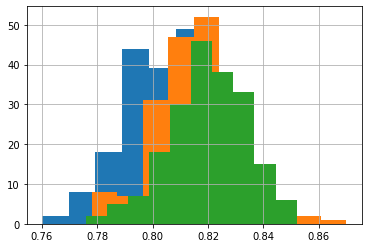

In [243]:
print(f'Mean Blue : {cross_valid.mean()}')
#print(f'Mean I Orange: {cross_valid_hyp.mean()}')
#print(f'Mean II Green: {cross_valid_hyp2.mean()}')
cross_valid.hist()
#cross_valid_hyp.hist()
#cross_valid_hyp2.hist()

### Training with 100% of data

In [1287]:
scor = []

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
features = train.columns.drop('Survived').copy()

X, y = train[features].copy(), train['Survived'].copy()
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.5, stratify=None)

for feat in range(len(features), 0, -1):
    #mdl = RandomForestClassifier(random_state=0)
    mdl = LogisticRegression(max_iter=2000)

    rfe = RFE(mdl, step=1, n_features_to_select=feat)
    rfe.fit(Xtrain, ytrain)
    feat_sel = Xtrain.columns[rfe.support_]
    pred = rfe.predict(Xvalid)

    f1 = f1_score(yvalid, pred)
    acc = np.mean(yvalid == pred)
    scor.append([feat_sel, f1, acc])

In [1288]:
feat_selected = pd.DataFrame(scor, columns=['features', 'f1', 'acc'])
feat_selected[feat_selected.acc == feat_selected['acc'].max()] # see the how index is max()

,features,f1,acc
4,"Index(['Pclass', 'Sex', 'age_4', 'age_30', 'ag...",0.776471,0.829596


In [1299]:
feat_selected = feat_selected.features[4]

In [1308]:
fs.shape

(26,)

# 08 - Test Data
___________________

In [1281]:
test = pd.DataFrame()

test['Pclass'] = df_test['Pclass'].copy()
test['Sex'] = df_test.Sex.map({
    'female':1,
    'male':0
}).copy()
#---------------------------------------
test['Age'] = df_test['Age'].copy()

med_cl_fem_3 = test.Age[(test.Pclass == 3) & (test.Sex == 1)].median()
med_cl_fem_2 = test.Age[(test.Pclass == 2) & (test.Sex == 1)].median()
med_cl_fem_1 = test.Age[(test.Pclass == 1) & (test.Sex == 1)].median()
med_cl_mal_3 = test.Age[(test.Pclass == 3) & (test.Sex == 0)].median()
med_cl_mal_2 = test.Age[(test.Pclass == 2) & (test.Sex == 0)].median()
med_cl_mal_1 = test.Age[(test.Pclass == 1) & (test.Sex == 0)].median()

test.Age[(test.Pclass == 3) & (test.Sex == 1)] = test.Age[(test.Pclass == 3) & (test.Sex == 1)].fillna(med_cl_fem_3)
test.Age[(test.Pclass == 2) & (test.Sex == 1)] = test.Age[(test.Pclass == 2) & (test.Sex == 1)].fillna(med_cl_fem_2)
test.Age[(test.Pclass == 1) & (test.Sex == 1)] = test.Age[(test.Pclass == 1) & (test.Sex == 1)].fillna(med_cl_fem_1)
test.Age[(test.Pclass == 3) & (test.Sex == 0)] = test.Age[(test.Pclass == 3) & (test.Sex == 0)].fillna(med_cl_mal_3)
test.Age[(test.Pclass == 2) & (test.Sex == 0)] = test.Age[(test.Pclass == 2) & (test.Sex == 0)].fillna(med_cl_mal_2)
test.Age[(test.Pclass == 1) & (test.Sex == 0)] = test.Age[(test.Pclass == 1) & (test.Sex == 0)].fillna(med_cl_mal_1)

#---------------------------------------

age_4 = test.Age[test.Age <=4].copy()
age_30 = test.Age[(test.Age >=4) & (test.Age <=30)].copy()
age_40 = test.Age[(test.Age >=31) & (test.Age <=40)].copy()
age_80 = test.Age[test.Age >=41].copy()
age_4.name, age_30.name = 'age_4', 'age_30'
age_40.name, age_80.name = 'age_40', 'age_80'

test = pd.concat([test, age_4], axis=1).fillna(0)
test = pd.concat([test, age_30], axis=1).fillna(0)
test = pd.concat([test, age_40], axis=1).fillna(0)
test = pd.concat([test, age_80], axis=1).fillna(0)

#---------------------------------------

test = test.drop(['Age'], axis=1)
test['Family_size'] = df_test.SibSp + df_test.Parch

#---------------------------------------

test['SibSp'] = df_test['SibSp'].copy()
test['Parch'] = df_test['Parch'].copy()

#---------------------------------------

outlier = np.mean(df_test.Fare) + (2 * np.std(df_test.Fare))
fare_out = df_test.Fare[df_test.Fare >= outlier].copy()
fare = df_test.Fare[df_test.Fare < outlier].copy()
fare_out.name, fare.name = 'Fare_out', 'Fare'

test = pd.concat([test, fare_out], axis=1).fillna(0)
test = pd.concat([test, fare], axis=1).fillna(0)

#---------------------------------------

test['Embarked'] = df_test['Embarked'].fillna('S').copy()
embark = pd.get_dummies(test['Embarked'], prefix='Embark')
test = pd.concat([test, embark], axis=1).copy()
test = test.drop('Embarked', axis=1).copy()

#---------------------------------------

test['Name'] = df_test.Name.copy()
surname = ['Mr.', 'Mrs', 'Miss', 'Master', 'Rev.', 'Dr', 'Col.', 'Sir.', 'Major', 'Don.', 'Capt']
for rep in surname:
    for name in test['Name'][test.Name.str.contains(rep, regex=False)]:
        if rep in ['Col.', 'Major', 'Capt']:
            test.replace(name, 'Army', inplace=True)
        elif rep in ['Sir.', 'Don.']:
            test.replace(name, 'Mr.', inplace=True)
        else:
            test.replace(name, rep, inplace=True)

for title in test.Name:
    if title not in ['Mr.', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Army']:
        test.replace(title, 'Miss', inplace=True)
        
name_dum = pd.get_dummies(test.Name, prefix='name').copy()
test = pd.concat([test, name_dum], axis=1)

test = test.drop('Name', axis=1)

#---------------------------------------

cab = df_test.Cabin.str.extract((r'([A-Za-z])'), ).fillna(0).copy()
cab_dum = pd.get_dummies(cab, prefix='Deck')
test = pd.concat([test, cab_dum], axis=1).copy()
test = test.drop(['Deck_0'], axis=1).copy()

#---------------------------------------

test['Deck_T'] = 0

#---------------------------------------

surname = df_test.Name.str.extract(r'(\w+)').copy()
surname.columns = ['Surname']

test = pd.concat([test, surname], axis=1).copy()
mapping = test.Surname.value_counts()
test.Surname = test.Surname.map(mapping).copy()

#---------------------------------------
null_cabin = df_test['Cabin'][df_test['Cabin'].isnull()]
null_cabin.fillna(1, inplace=True)
null_cabin.name = 'Null_Cabin'
test = pd.concat([test, null_cabin], axis=1).fillna(0).copy()
# features = test.columns.copy()
features = feat_selected

# 09 - Submission
___________________

In [1321]:
X, y = train[feat_selected], train['Survived']

In [1324]:
models = [LogisticRegression(max_iter=2000)]

In [1327]:
for model in models:
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(
        X, y, test_size=0.5, stratify=None, random_state=0) 

    mdl = model
    mdl.fit(Xtrain, ytrain)
    pred = mdl.predict(test[feat_selected])
    mod_name = str(model)[:4]

    sub = pd.DataFrame({
    'PassengerId':df_test['PassengerId'],
    'Survived':pred
    })

    sub.to_csv(f"sub_feat_sel{mod_name}.csv", index=False)

In [1234]:
def sub_RF_params(params):

    max_depth = params[0]
    random_state= params[1]
    n_estimators = params[2]
    max_features = params[3]
    min_samples_split = params[4]
    min_samples_leaf = params[5]
    bootstrap = params[6]

    mdl = RandomForestClassifier(max_depth=max_depth, 
                                 random_state=random_state, 
                                 n_estimators=n_estimators,
                                 max_features=max_features, 
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 bootstrap=bootstrap, n_jobs=-1)
    mdl.fit(Xtrain, ytrain)
    pred = mdl.predict(test[features])
    mod_name = str(mdl)[:4]

    sub = pd.DataFrame({
    'PassengerId':df_test['PassengerId'],
    'Survived':pred
    })

    sub.to_csv(f"sub_feat_sel{mod_name}_I.csv", index=False)
sub_RF_params(parameters2)

# 10 - Deployment
___________________